## Importing the libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data Collection and Processing

In [9]:
#Loading the csv data to the pandas dataframe

In [2]:
data = pd.read_csv("gld_price_data.csv")

In [3]:
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
#Printing the first five rows in dataframe
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [11]:
#Printing the last five rows of dataframe
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [12]:
# Number of rows and columns
data.shape

(2290, 6)

In [13]:
#Getting some basic information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [14]:
# Checking no of missing vslues
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

#### We don't have any null values

In [15]:
# Finding statistical measures of data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [18]:
# Finding correlation:
# 1.Positive correlation
# 2.Negative correlation
correlation = data.corr()

<AxesSubplot:>

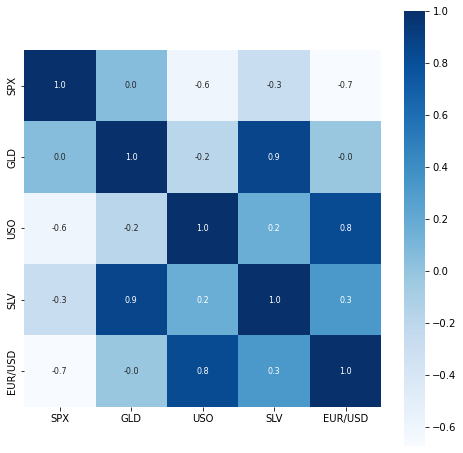

In [23]:
# Making a heatmap to understand the correlation 
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar = True,square = True,fmt = '.1f',annot = True,annot_kws = {'size':8},cmap = 'Blues')

In [24]:
# Correlation values of Gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Density'>

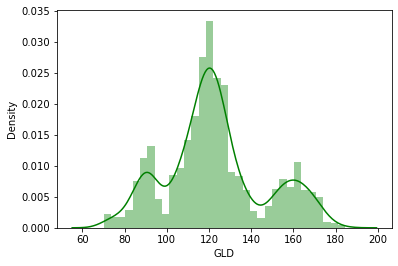

In [31]:
# Checking the distribution of gold price
sns.distplot(data['GLD'],color = 'GREEN')

## Splitting the features and Target

In [33]:
X = data.drop(['Date','GLD'],axis = 1)
Y = data['GLD']

In [34]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [35]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Splitting into Training data and Test data

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

## Model Training:Random Forest and Regressor

In [37]:
regressor = RandomForestRegressor(n_estimators = 100)

In [40]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

## Model evaluation

In [41]:
# Prediction on Test data
test_data_prediction = regressor.predict(X_test)

In [42]:
print(test_data_prediction)

[168.74879904  81.74759993 116.32060034 127.5962006  120.70060151
 154.75329696 150.58689827 126.20109979 117.56909873 125.95710065
 116.71260121 172.39450102 141.22839862 167.50059783 115.18070001
 117.66820029 137.98790377 170.16200049 159.40480252 157.26579959
 155.12049979 125.13330038 175.87789971 156.34060307 125.15480069
  93.92499942  77.85630013 120.82410039 119.01979906 167.52960015
  88.03070057 125.20539972  91.31760062 117.66320029 121.22529923
 136.24390068 115.64470102 114.76030082 148.42440017 106.92750097
 104.45030262  87.19319788 126.60910034 117.8625003  151.48079846
 119.58599991 108.38329984 107.92639826  93.20820039 127.12899776
  74.9347003  113.71499945 121.3283001  111.20229901 119.03559905
 120.73669918 159.20300013 169.17240037 147.03019697  85.75439863
  94.22030021  86.77949867  90.38859993 119.05240085 126.44490086
 127.43170005 169.65259976 122.15189909 117.41189862  98.58220046
 168.62910087 143.16609886 131.52420265 121.16400237 121.45589915
 119.78710

In [44]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error :",error_score)

R squared error : 0.9888639156757735


## Compare the actual and predicted values in a plot 

In [45]:
Y_test = list(Y_test)

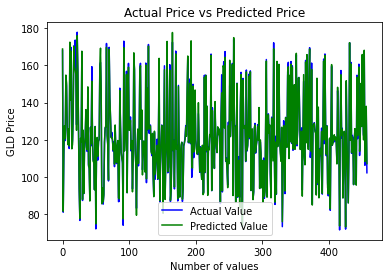

In [46]:
plt.plot(Y_test,color = 'blue',label = 'Actual Value')
plt.plot(test_data_prediction,color = 'green',label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()